In [1]:
# import libries
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

# import external python files
import vae_fire 
from vae_fire_tools import *

In [2]:
# load train data, test data
# get reshaped train data(fire_train), get reshaped test data(fire_test)
train_data, test_data, fire_train, fire_test = load_reshape_dataset()

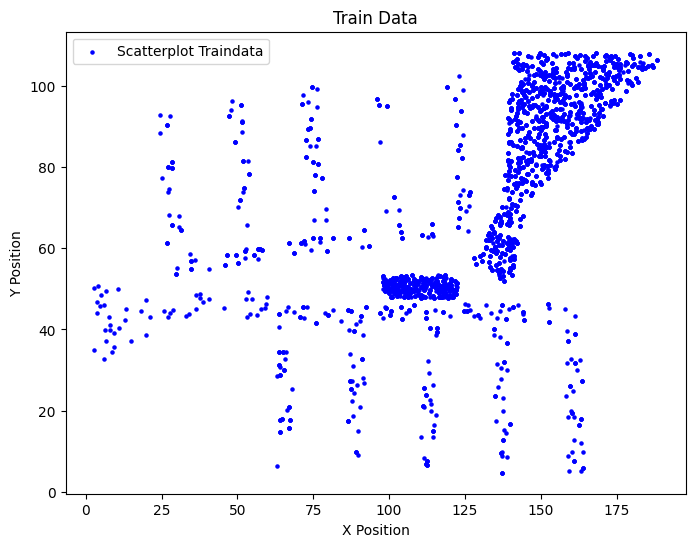

In [3]:
# scatter plot of train data
scatterplot_traindata(train_data)

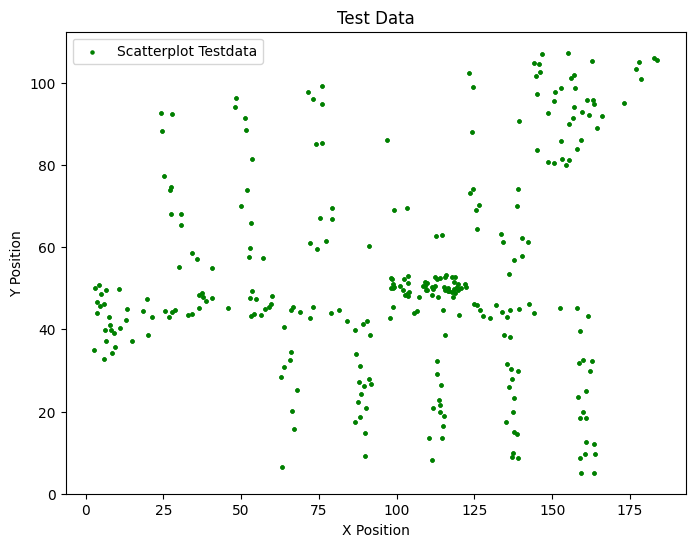

In [4]:
# scatter plot of test data
scatterplot_testdata(test_data)

In [5]:
# define parameters for training VAE
latent_dim = 2
batch_size = 64
epochs = 200
lr = 0.005
num_smaples = 1000

autoencoder = vae_fire.VariationalAutoencoder(latent_dim).to("cpu")
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

In [6]:
# get train losses and test losses
train_loss_list = []
test_loss_list = []

# train and test VAE model
for epoch in range(epochs):
    train_loss = get_train_loss(autoencoder, fire_train, optimizer, epochs=epochs)
    print('Epoch', epoch, 'train loss', train_loss)
    train_loss_list.append(train_loss)
    
    test_loss = get_test_loss(autoencoder, fire_test, epochs=epochs)
    print('Epoch', epoch, 'test loss', test_loss)
    test_loss_list.append(test_loss)

Epoch 0 train loss 300.5757177762985
Epoch 0 test loss 269.92060280481974
Epoch 1 train loss 76.77144092877705
Epoch 1 test loss 53.04198688348134
Epoch 2 train loss 40.5958950937589
Epoch 2 test loss 190.99836511611937
Epoch 3 train loss 39.647312365531924
Epoch 3 test loss 31.049847639401754
Epoch 4 train loss 49.45446810547511
Epoch 4 test loss 31.898374428749083
Epoch 5 train loss 29.021137554804483
Epoch 5 test loss 59.33682134628296
Epoch 6 train loss 25.49654808219274
Epoch 6 test loss 46.12988534530004
Epoch 7 train loss 26.013596787770588
Epoch 7 test loss 42.65871190786362
Epoch 8 train loss 24.50427335993449
Epoch 8 test loss 36.22382152954737
Epoch 9 train loss 21.181307193597156
Epoch 9 test loss 38.864524602890015
Epoch 10 train loss 20.76411860879262
Epoch 10 test loss 154.58835722287495
Epoch 11 train loss 24.99452915541331
Epoch 11 test loss 56.01463718255361
Epoch 12 train loss 20.71061137564977
Epoch 12 test loss 51.49987351894379
Epoch 13 train loss 21.0863439846038

Epoch 108 train loss 17.670168843746186
Epoch 108 test loss 27.791959390640258
Epoch 109 train loss 17.00340590429306
Epoch 109 test loss 25.074281400044757
Epoch 110 train loss 17.482706268310547
Epoch 110 test loss 21.586128977934518
Epoch 111 train loss 16.375231284777325
Epoch 111 test loss 34.61849041859309
Epoch 112 train loss 16.541295101006824
Epoch 112 test loss 17.904422245025636
Epoch 113 train loss 17.040251045227052
Epoch 113 test loss 38.22511737823486
Epoch 114 train loss 18.781672074476877
Epoch 114 test loss 34.549299490451816
Epoch 115 train loss 16.877118884722393
Epoch 115 test loss 31.147747589747112
Epoch 116 train loss 16.202439638455708
Epoch 116 test loss 31.233501585324607
Epoch 117 train loss 18.46002705860138
Epoch 117 test loss 23.50104449033737
Epoch 118 train loss 16.121415629227958
Epoch 118 test loss 20.453834619522095
Epoch 119 train loss 16.458019391377768
Epoch 119 test loss 45.363508253097535
Epoch 120 train loss 16.469910584926605
Epoch 120 test lo

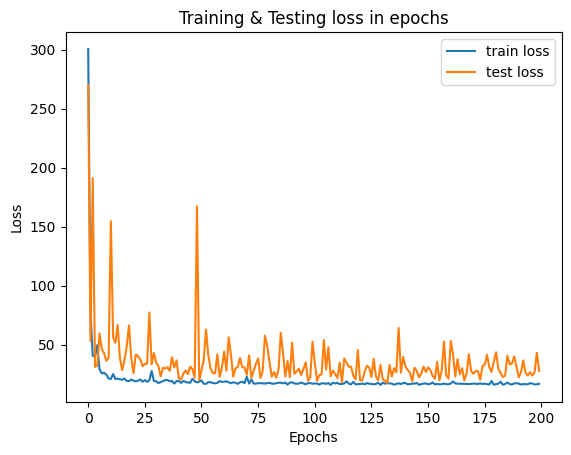

In [7]:
# plot train losses curve and test losses curve
plot_loss(train_loss_list, test_loss_list)

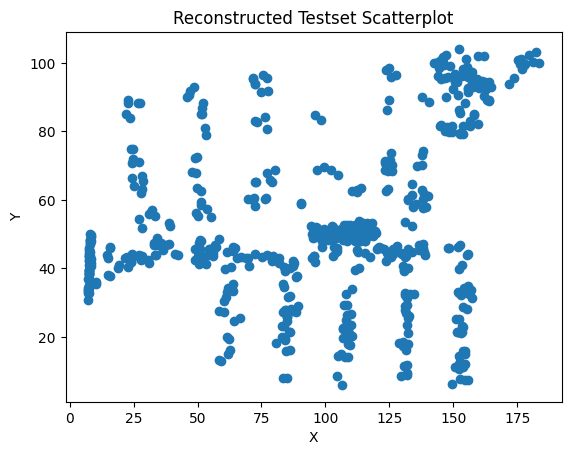

In [7]:
# scatter plot of the reconstructed test set
plot_reconstructed_testset(autoencoder, fire_test)

In [16]:
def plot_generated_sample(model, num_smaples, latent_dim):
    """
    Function to plot the generated samples.
 
    Args:
        prior_samples: a tensor of random samples drawn from a standard normal distribution
                       shape is: (num_samples, latent_dim).                   
        torch.no_grad(): ensures that no gradients are computed during this forward pass.    
        generated_digits: the results after passing prior_samples through the decoder
                          then detached from the computation graph and converted to a NumPy array.                        
        generated_np: reshape the array to remove the singleton dimensions.
        x, y: get the x and y coordinates from the generated_np
        
    """

    prior_samples = torch.randn(num_smaples, latent_dim) 
    with torch.no_grad():
        generated_digits = model.decoder(prior_samples).detach().numpy()
        
    
    generated_np = generated_digits.reshape(-1, 2)
    x = generated_np[:, 0]
    y = generated_np[:, 1]

    plt.scatter(x, y, color='green')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Generated Digits Scatterplot')
    plt.savefig("outputs/scatterplot_generated_samples.png")  
    plt.show()

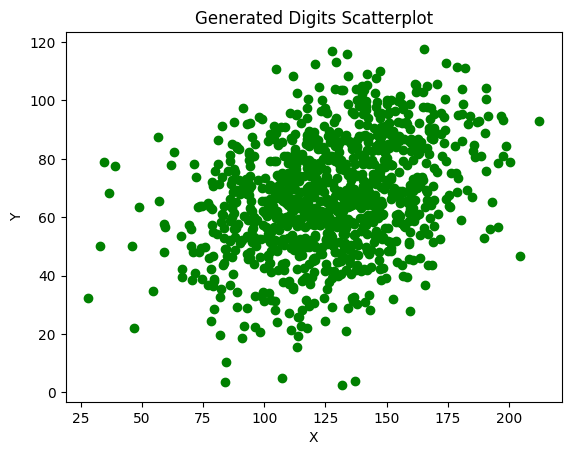

In [17]:
# scatter plot of 1000 generated samples
plot_generated_sample(autoencoder, num_smaples, latent_dim)

In [9]:
# get number of samples needed to exceed the critical number
num_samples_needed = estimate_critical_number(autoencoder, latent_dim)
print("Number of samples needed to exceed the critical number:", num_samples_needed)

Number of samples needed to exceed the critical number: 1238
